Escriba en un notebook de jupyter una explicaci´on de alg´un m´etodo para
encontar la recta que mejor ajusta a un conjunto de puntos. Deje en claro
que requisitos anteriores deben tener los estudiantes (por ejemplo, ´algebra
lineal, ecuaciones diferenciales, transformada de Fourier, etc) para entender
el m´etodo propuesto. Para explicar los conceptos cree un conjunto de
puntos y haga el ajuste de la recta

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = linspace(0,10,20)

In [3]:
M = 3.5
B = -10

In [4]:
random.normal(x,3)

array([-6.85609164,  3.17313857,  5.41552458, -1.69898273, -1.58108512,
        6.48199461,  0.94913788,  2.19005934,  2.11756724,  4.4955647 ,
        4.53066328,  6.38939553,  4.76894682,  4.05900592,  7.704468  ,
        7.75179029, 11.23088046, 11.11117815,  4.41889606,  9.06442741])

In [5]:
y = random.normal(M*x + B,3)

Text(0.5, 1.0, 'Datos Experimentales')

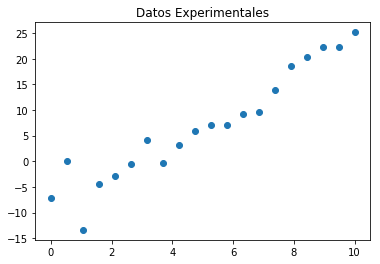

In [6]:

scatter(x,y)
plt.title("Datos Experimentales")

In [7]:
m_0 = 1
b_0 = 1


# Método Markov-Chain Monte Carlo

Text(0.5, 1.0, 'Condición inicial')

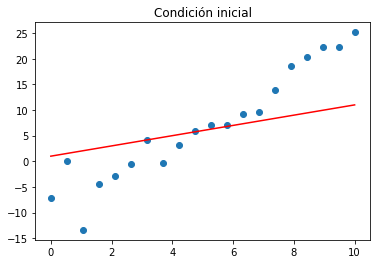

In [8]:
scatter(x,y)
plot(x, m_0 * x +b_0, color = "red")
plt.title("Condición inicial")

In [9]:
y - m_0*x + b_0

array([ -6.16002384,   0.49709688, -13.42039066,  -5.04593378,
        -3.8877545 ,  -2.20894008,   1.92270932,  -2.93655157,
        -0.11308148,   2.21420117,   2.75970506,   2.25798659,
         4.00223559,   3.78407244,   7.50749053,  11.78348402,
        12.95400135,  14.34984146,  13.8088707 ,  16.15378411])

Likelihood

$ L = e^{- (f(x,m,b) - y(x))^2 }$

Podemos trabajar con $\ln(L)$

In [10]:
a = 0

m = 1
b = 1

for i in range( len(x)):
    a += ( y[i] - m * x[i] - b)**2
    
print(a)

1183.7180220279006


Variamos los parámetros aleatoriamente

In [11]:
m_new = m + random.normal(0,1)
b_new = b + random.normal(0,1)

print("m_new = ", m_new, ", b_new = ", b_new)

m_new =  0.37929060599187747 , b_new =  -0.31039249118240564


In [12]:
# Calculamos el nuevo valor de a

a_new = 0

for i in range( len(x)):
    a_new += ( y[i] - m_new * x[i] - b_new )**2
    
print(a_new)

2350.811464191399


Comparamos los nuevos parámetros, si nos gustan los aceptamos, si no, los dejamos.

DEJAMOS REGISTRO DE TODOS LOS VALORES!!!

Si mejora el ajuste, los aceptamos inmediatamente, si no mejora, tenemos una probabilidad de aceptar estos valores.

In [31]:


b_old = 0
m_old = 0

a_old = 0
for i in range( len(x)):
    a_old -= ( y[i] - m_old * x[i] - b_old )**2

historic=[]

N_steps = 1000

for counter in range(N_steps):
    m_new = m_old + random.normal(0 , 1)
    b_new = b_old + random.normal(0 , 1)

    a_new = 0

    for i in range( len(x)):
        a_new -= ( y[i] - m_new * x[i] - b_new )**2

    if (a_new > a_old):
        m_old = m_new
        b_old = b_new
        a_old = a_new
    else:
        if (rand() > 0.7 ):
            m_old = m_new
            b_old = b_new
            a_old = a_new


    historic.append([counter, m_new, b_new, a_old])

In [37]:
historic[2][:]

[2, 0.9156166923154181, 2.136614990496558, -1238.1106702498382]